In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image = cv2.imread('/content/drive/MyDrive/piston.jpg')

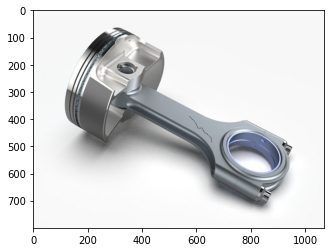

In [ ]:
plt.imshow(image)

In [ ]:
image.shape

(800, 1070, 3)

In [ ]:
image1 = cv2.imread('/content/drive/MyDrive/piston_reference.jpg')

In [ ]:
image1.shape

(800, 1070, 3)

In [ ]:
image1 = cv2.resize(image1, (500,433),cv2.INTER_AREA)

In [ ]:
image1.shape

(433, 500, 3)

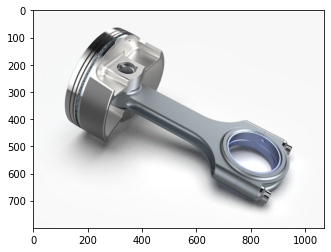

In [ ]:
plt.imshow(image1)

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

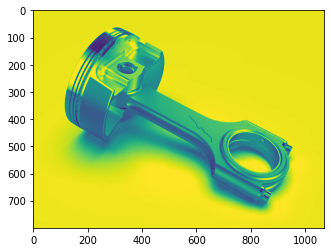

In [ ]:
plt.imshow(image)

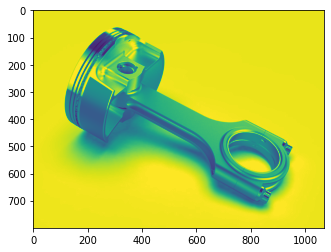

In [ ]:
plt.imshow(image1)

In [ ]:
image1

array([[247, 247, 247, ..., 247, 247, 247],
       [247, 247, 247, ..., 247, 247, 247],
       [247, 247, 247, ..., 247, 247, 247],
       ...,
       [248, 248, 248, ..., 248, 248, 248],
       [248, 248, 248, ..., 248, 248, 248],
       [248, 248, 248, ..., 248, 248, 248]], dtype=uint8)

In [ ]:
image

array([[247, 247, 247, ..., 247, 247, 247],
       [247, 247, 247, ..., 247, 247, 247],
       [247, 247, 247, ..., 247, 247, 247],
       ...,
       [248, 248, 248, ..., 248, 248, 248],
       [248, 248, 248, ..., 248, 248, 248],
       [248, 248, 248, ..., 248, 248, 248]], dtype=uint8)

In [ ]:
diff = image1 - image

In [ ]:
diff

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
for i in range(800):
  for j in range(1070):
    if diff[i][j] >= 150:
      continue
    else:
      diff[i][j]=255

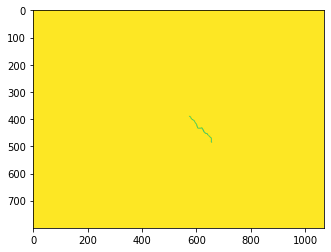

In [ ]:
plt.imshow(diff)

In [ ]:
can = cv2.Canny(diff, 100, 255)

In [ ]:
can

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

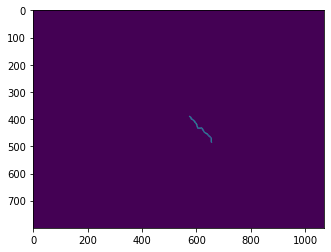

In [ ]:
plt.imshow(can)

In [ ]:
minx = 0
miny = 0
flag = 0
for i in range(1070):
  for j in range(800):
    if can[j][i]==255:
      minx = i
      miny = j
      flag = 1
      break
  if flag==1:
    break
print(minx, miny)

574 389


In [ ]:
maxx = 0
maxy = 0
for i in range(1070):
  for j in range(800):
    if can[j][i]==255:
      maxx = i
      maxy = j
print(maxx, maxy)

657 486


In [ ]:
import math
length = math.sqrt( ((maxx-minx)**2)+((maxy-miny)**2) )

print(length)

127.66362050325849


In mm

In [ ]:
maxx - minx #pixels

83

In [ ]:
(70*83)/1070 #mm

5.429906542056075

In [ ]:
maxy - miny #pixels

97

In [ ]:
(35*97)/800 #mm

4.24375

Length of crack in mm

In [ ]:
length = math.sqrt( ((5.429906542056075)**2)+((4.24375)**2) )

print(length)

6.8915382258218205


In [ ]:
cimg= cv2.Canny(image, 100, 250)
cimg1= cv2.Canny(image1, 100, 250)

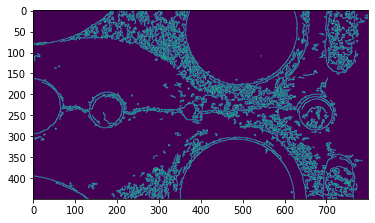

In [ ]:
plt.imshow(cimg)

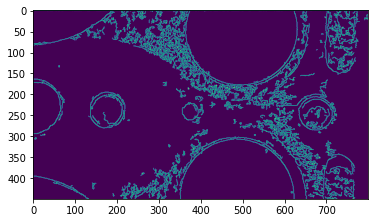

In [ ]:
plt.imshow(cimg1)

In [ ]:
cimg[270,:]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,
         0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 25

In [ ]:
cimg1[270,:]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,
         0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 25

(450, 800, 3)


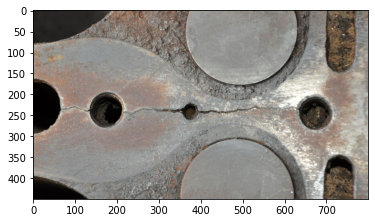

In [ ]:
pic = plt.imread('/content/drive/MyDrive/cracked-engine-block.jpg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

In [ ]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(360000, 3)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

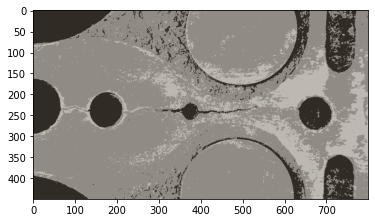

In [ ]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

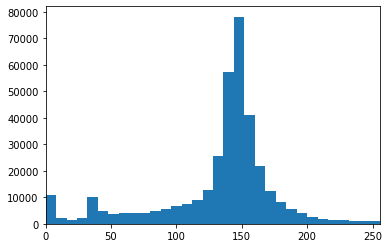

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.hist(image.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

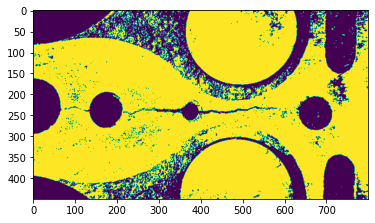

In [ ]:
text_segmented = image > (130)
plt.imshow(text_segmented)

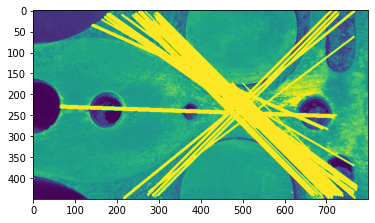

In [ ]:
image = cv2.imread('/content/drive/MyDrive/cracked-engine-block.jpg')
#image = cv2.GaussianBlur(image,(5,5),0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cimg= cv2.Canny(image, 100, 250)

lines = cv2.HoughLinesP(cimg, 1, np.pi/180, 120, minLineLength=80, maxLineGap=100)

# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 3)

# Show result
plt.imshow(image)